<a href="https://colab.research.google.com/github/marinasemushina/-_-3/blob/main/Lab1_part2_ml_pipeline_%D0%A1%D0%B5%D0%BC%D1%83%D1%88%D0%B8%D0%BD%D0%B0%D0%9C%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

In [1]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead
! pip install scikit-plot

In [2]:
!pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, but you have scipy 1.9.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
cvxpy 1.6.3 requi

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-03-16 05:16:21--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2025-03-16 05:16:21 (5.23 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,637,86,44,65,129,56,6,152,45,19,150,168,331,177,83,4,13,178,183
1,43,93,37,76,183,63,8,164,40,20,134,191,405,139,67,4,7,192,197
2,622,96,40,100,178,58,8,181,37,21,134,205,486,160,68,5,34,192,202
3,105,108,53,103,202,64,10,220,30,25,168,224,711,214,73,11,10,188,199
4,774,94,37,72,146,60,9,133,50,18,135,161,262,128,69,2,7,192,195
5,163,85,40,72,139,59,5,132,50,18,135,159,260,150,68,3,9,191,195
6,268,86,39,60,140,60,7,119,55,17,134,140,212,141,61,7,8,200,207
7,208,86,46,70,149,65,8,149,45,19,146,170,331,185,77,6,6,183,188
8,343,102,54,101,190,58,10,222,30,25,171,224,728,203,71,13,6,189,198
9,631,103,49,107,179,54,12,208,32,24,159,214,644,183,66,1,12,191,200


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,435.805100,93.446266,44.766849,81.808743,168.437158,61.786885,8.553734,167.994536,41.100182,20.513661,147.673953,187.832423,435.349727,173.881603,72.417122,6.306011,12.446266,189.010929,195.597450
std,246.324619,7.940204,6.156736,15.517174,32.560025,7.948519,4.742198,32.752416,7.756265,2.549920,14.377892,30.581905,173.720457,32.061850,7.385313,4.865826,8.918903,6.202474,7.435862
min,1.000000,76.000000,34.000000,44.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,109.000000,61.000000,0.000000,0.000000,176.000000,181.000000
25%,225.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,167.000000,319.000000,148.000000,68.000000,2.000000,6.000000,185.000000,190.000000
50%,438.000000,92.000000,44.000000,79.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,653.000000,99.000000,49.000000,96.000000,195.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,579.000000,198.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,115.000000,58.000000,110.000000,322.000000,133.000000,52.000000,265.000000,59.000000,29.000000,188.000000,285.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Нормализация завершена.")

Нормализация завершена.


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt

# Настройка логистической регрессии
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Определение сетки гиперпараметров
param_grid = {
    'C': [0.1, 1, 10]  # Регуляризация
}

# Поиск оптимальных гиперпараметров с кросс-валидацией
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Оценка качества модели
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [8]:
print(f'Optimal Hyperparameters: {grid_search.best_params_}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')

Optimal Hyperparameters: {'C': 10}
F1 Score: 0.76
Accuracy: 0.76


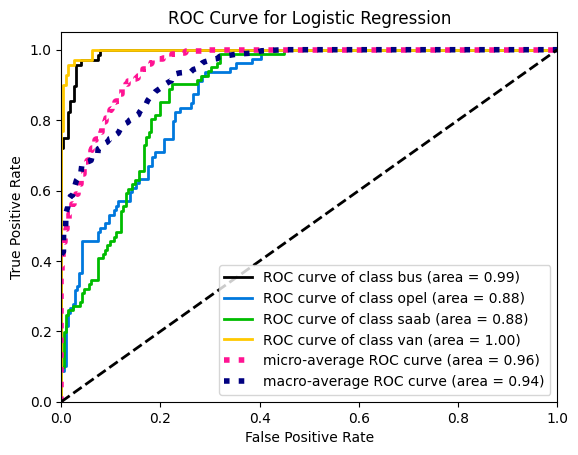

In [9]:
# Построение ROC-кривой
y_proba = best_model.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_proba)
plt.title('ROC Curve for Logistic Regression')
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

Выбрано количество компонентов: 8


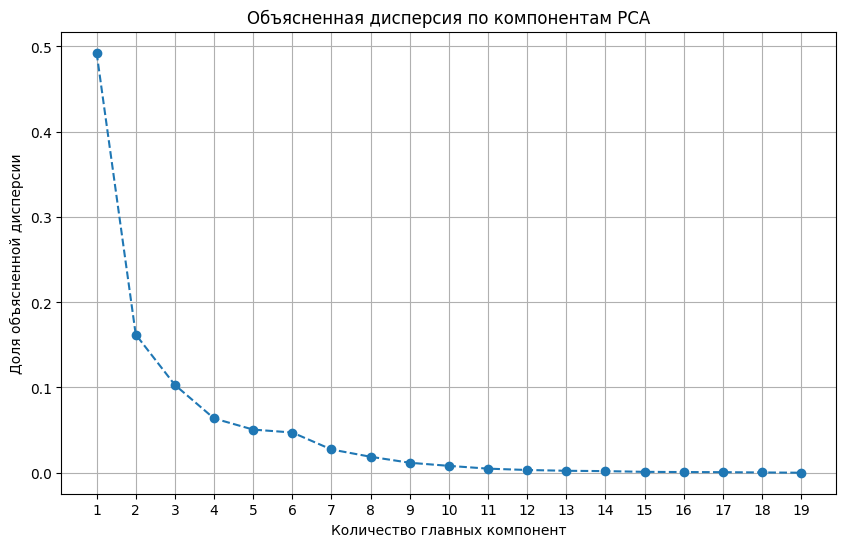

In [10]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Применение PCA к обучающим данным
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Получение объясненной дисперсии
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Выбор количества компонентов
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Выбрано количество компонентов: {n_components}")


# Построение графика объясненной дисперсии
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Объясненная дисперсия по компонентам PCA')
plt.xlabel('Количество главных компонент')
plt.ylabel('Доля объясненной дисперсии')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [11]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline

# Выбор числа компонент
n_components = 8

# Создание Pipeline
pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=n_components))
])

# Преобразование обучающей и тестовой выборок
X_train_pca = pipeline.fit_transform(X_train)
X_test_pca = pipeline.transform(X_test)

print(f'Исходное количество признаков: {X_train.shape[1]}')
print(f'Количество признаков после PCA: {X_train_pca.shape[1]}')

Исходное количество признаков: 19
Количество признаков после PCA: 8


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Лучшие параметры: {'logreg__C': 0.01, 'logreg__max_iter': 200}
F1 Score: 0.5597
Accuracy: 0.5758


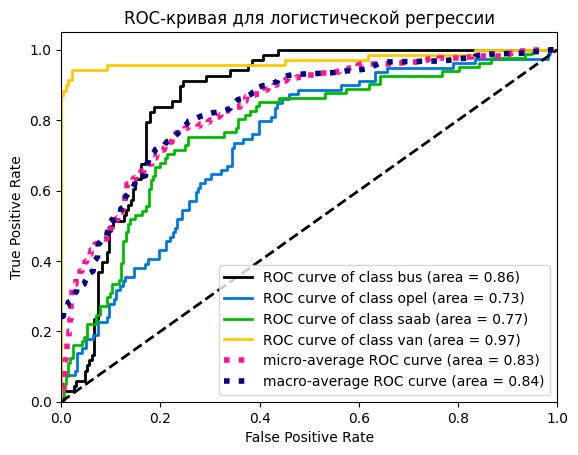

In [12]:
### YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
import scikitplot as skplt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Создание пайплайна
pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=8)),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3))
])
# Определение параметров для поиска
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Регуляризация
    'logreg__max_iter': [100, 200, 300]   # Максимальное количество итераций
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Обучение модели
grid_search.fit(X_train, y_train)

# Оптимальные параметры
print("Лучшие параметры:", grid_search.best_params_)
# Предсказания
y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)

# Оценка качества
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
# Построение ROC-кривой
skplt.metrics.plot_roc(y_test, y_proba)
plt.title('ROC-кривая для логистической регрессии')
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [23]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
# YOUR CODE HERE
# Определение модели дерева решений
decision_tree = DecisionTreeClassifier(random_state=42)
# Определение параметров для поиска
param_grid = {
    'max_depth': np.arange(1, 21),  # Поиск глубины от 1 до 20
    'min_samples_split': np.arange(2, 11),  # Минимальное количество образцов для разделения
    'min_samples_leaf': np.arange(1, 11)     # Минимальное количество образцов в листе
}

# Создание объекта GridSearchCV
grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Обучение модели
grid_search_dt.fit(X_train, y_train)

# Оптимальная глубина
print("Оптимальная глубина дерева:", grid_search_dt.best_params_['max_depth'])

# Предсказания
y_pred_dt = grid_search_dt.predict(X_test)

# Оценка качества
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f'F1 Score для дерева решений: {f1_dt:.4f}')
print(f'Accuracy для дерева решений: {accuracy_dt:.4f}')


Оптимальная глубина дерева: 13
F1 Score для дерева решений: 0.6554
Accuracy для дерева решений: 0.6397


Анализ результатов:
Оптимальная глубина дерева: 13 - дерево достаточно глубокое, чтобы захватить сложные закономерности в данных, но не настолько глубокое, чтобы начать переобучаться.
F1 Score: 0.6554 - модель демонстрирует хорошую производительность в отношении точности и полноты. Есть еще возможность для улучшения.
Accuracy: 0.6397 - доля правильных предсказаний составляет 63.97%. Это также указывает на то, что модель работает лучше, чем случайное угадывание, но есть место для улучшения. Улучшить можно за счет настройки гиперпараметров, изменении признаков например и др


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [24]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
# Параметры
Nmin = 2
Nmax = 100
step = 5

f1_scores_logreg = []
accuracy_scores_logreg = []
f1_scores_dt = []
accuracy_scores_dt = []

# Бэггинг для логистических регрессий
for N in range(Nmin, Nmax + 1, step):
    bagging_logreg = BaggingClassifier(estimator=LogisticRegression(), n_estimators=N, random_state=42)
    bagging_logreg.fit(X_train, y_train)

    y_pred_logreg = bagging_logreg.predict(X_test)
    f1_scores_logreg.append(f1_score(y_test, y_pred_logreg, average='macro'))
    accuracy_scores_logreg.append(accuracy_score(y_test, y_pred_logreg))

# Бэггинг для деревьев решений
for N in range(Nmin, Nmax + 1, step):
    bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=grid_search_dt.best_params_['max_depth']), n_estimators=N, random_state=42)
    bagging_dt.fit(X_train, y_train)

    y_pred_dt = bagging_dt.predict(X_test)
    f1_scores_dt.append(f1_score(y_test, y_pred_dt, average='macro'))
    accuracy_scores_dt.append(accuracy_score(y_test, y_pred_dt))

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

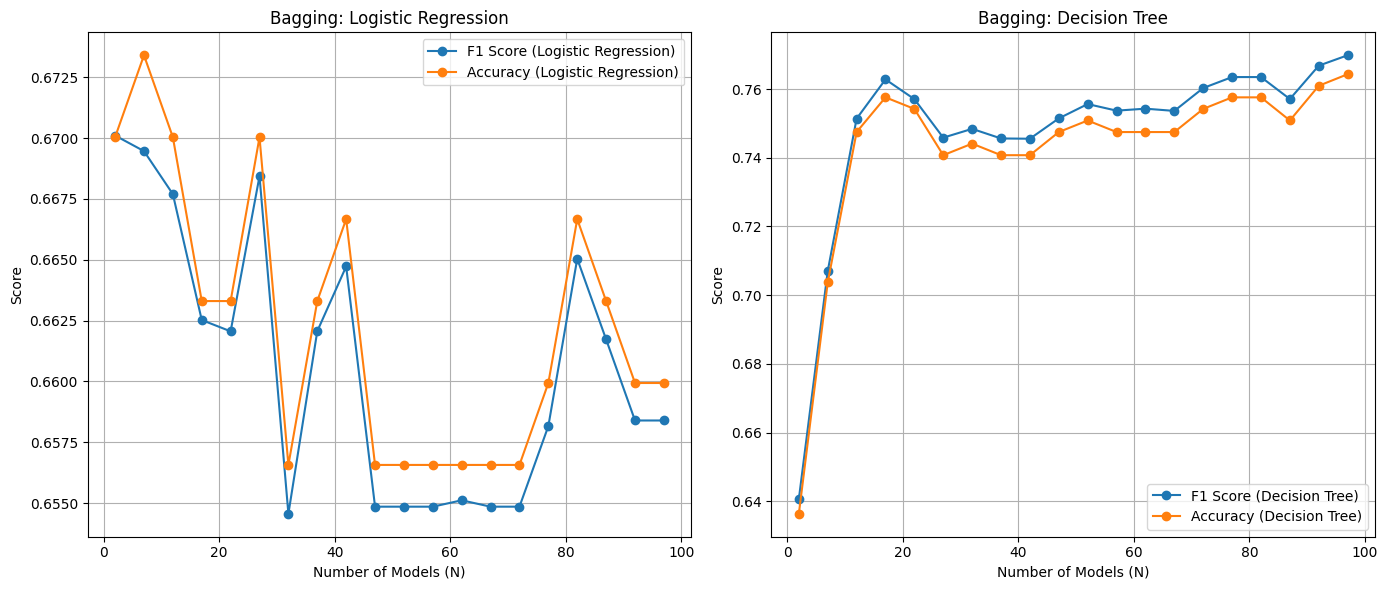

In [26]:
# Построение графиков
plt.figure(figsize=(14, 6))

# График для логистических регрессий
plt.subplot(1, 2, 1)
plt.plot(range(Nmin, Nmax + 1, step), f1_scores_logreg, label='F1 Score (Logistic Regression)', marker='o')
plt.plot(range(Nmin, Nmax + 1, step), accuracy_scores_logreg, label='Accuracy (Logistic Regression)', marker='o')
plt.title('Bagging: Logistic Regression')
plt.xlabel('Number of Models (N)')
plt.ylabel('Score')
plt.legend()
plt.grid()

# График для деревьев решений
plt.subplot(1, 2, 2)
plt.plot(range(Nmin, Nmax + 1, step), f1_scores_dt, label='F1 Score (Decision Tree)', marker='o')
plt.plot(range(Nmin, Nmax + 1, step), accuracy_scores_dt, label='Accuracy (Decision Tree)', marker='o')
plt.title('Bagging: Decision Tree')
plt.xlabel('Number of Models (N)')
plt.ylabel('Score')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

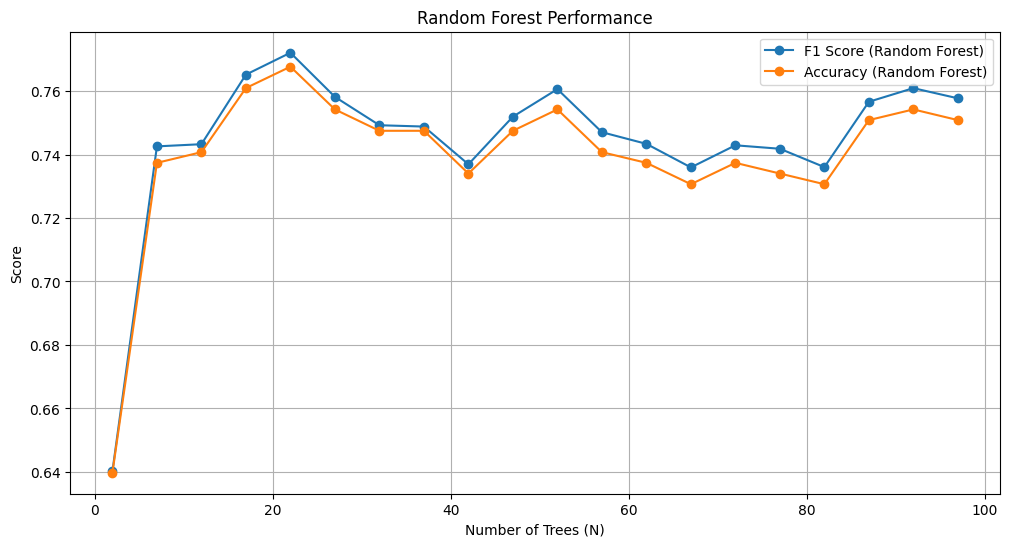

In [27]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
# Параметры
Nmin = 2
Nmax = 100
step = 5

f1_scores_rf = []
accuracy_scores_rf = []

# Обучение случайного леса с варьированием количества деревьев
for N in range(Nmin, Nmax + 1, step):
    rf = RandomForestClassifier(n_estimators=N, random_state=42)
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    f1_scores_rf.append(f1_score(y_test, y_pred_rf, average='macro'))
    accuracy_scores_rf.append(accuracy_score(y_test, y_pred_rf))

# Построение графиков
plt.figure(figsize=(12, 6))

# График для случайного леса
plt.plot(range(Nmin, Nmax + 1, step), f1_scores_rf, label='F1 Score (Random Forest)', marker='o')
plt.plot(range(Nmin, Nmax + 1, step), accuracy_scores_rf, label='Accuracy (Random Forest)', marker='o')
plt.title('Random Forest Performance')
plt.xlabel('Number of Trees (N)')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [60]:
# Разделение обучающих данных на 10 частей
n_splits = 10
split_size = len(X_train) // n_splits

# Модели
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
}

# Списки для хранения результатов
results = {model_name: {'f1': [], 'accuracy': []} for model_name in models.keys()}
results['Random Forest'] = {'f1': [], 'accuracy': []}

# Обучение и оценка моделей
for i in range(1, n_splits + 1):
    # Объединение первых i частей
    X_train_subset = X_train[:i * split_size]
    y_train_subset = y_train[:i * split_size]

    # Обучение и оценка Logistic Regression и Decision Tree
    for model_name, model in models.items():
        model.fit(X_train_subset, y_train_subset)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        results[model_name]['f1'].append(f1)
        results[model_name]['accuracy'].append(accuracy)

    # Оптимизация n_estimators для Random Forest
    n_estimators_range = [50, 100, 150, 200, 250]
    best_f1 = 0
    best_accuracy = 0
    best_n_estimators = 0

    for n in n_estimators_range:
        rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
        rf_model.fit(X_train_subset, y_train_subset)
        y_pred = rf_model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        # Сохраняем результат для текущего n_estimators
        if f1 > best_f1:
            best_f1 = f1
            best_accuracy = accuracy
            best_n_estimators = n

    # Сохраняем лучшие результаты Random Forest
    results['Random Forest']['f1'].append(best_f1)
    results['Random Forest']['accuracy'].append(best_accuracy)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [65]:
for model_name, metrics in results.items():
    best_f1 = max(metrics['f1'])
    best_accuracy = max(metrics['accuracy'])
    print(f"{model_name}:")
    print(f"  Best F1 Score: {round(best_f1, 3)}")
    print(f"  Best Accuracy: {round(best_accuracy, 3)}")

Logistic Regression:
  Best F1 Score: 0.79
  Best Accuracy: 0.781
Decision Tree:
  Best F1 Score: 0.701
  Best Accuracy: 0.69
Random Forest:
  Best F1 Score: 0.772
  Best Accuracy: 0.768


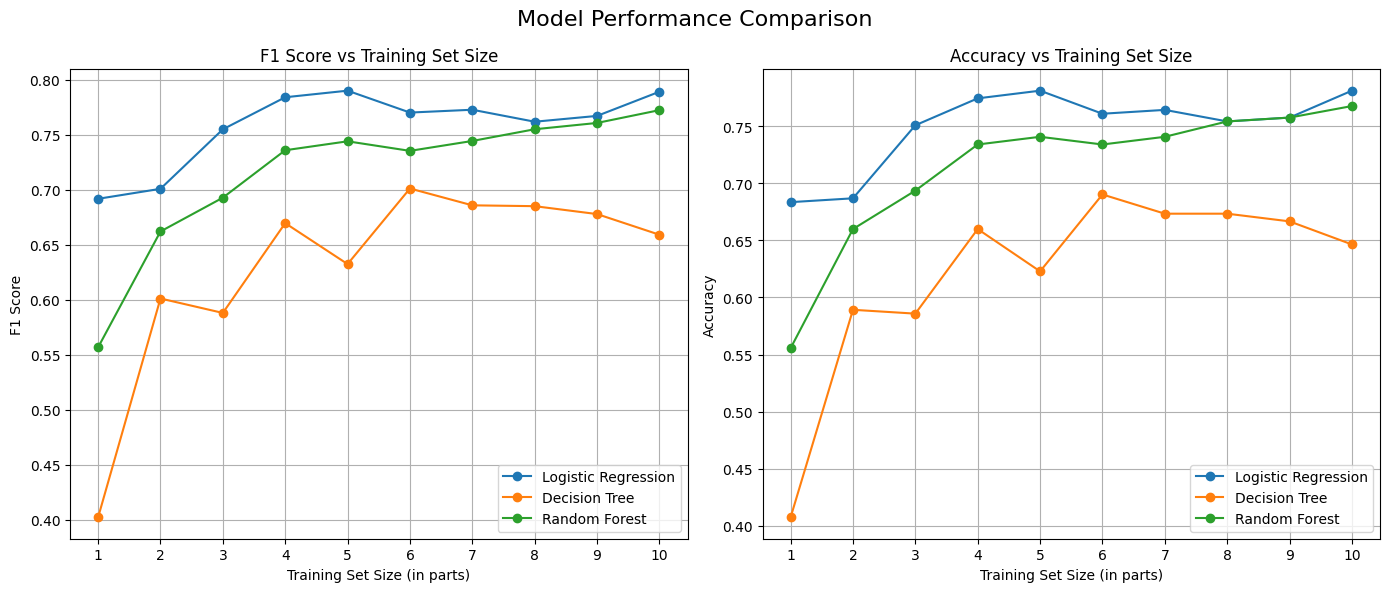

In [66]:
# Построение графиков
plt.figure(figsize=(14, 6))

# График F1-метрики
plt.subplot(1, 2, 1)
for model_name in results.keys():
    plt.plot(range(1, n_splits + 1), results[model_name]['f1'], label=model_name, marker='o')
plt.title('F1 Score vs Training Set Size')
plt.xlabel('Training Set Size (in parts)')
plt.ylabel('F1 Score')
plt.xticks(range(1, n_splits + 1))
plt.legend()
plt.grid()

# График точности
plt.subplot(1, 2, 2)
for model_name in results.keys():
    plt.plot(range(1, n_splits + 1), results[model_name]['accuracy'], label=model_name, marker='o')
plt.title('Accuracy vs Training Set Size')
plt.xlabel('Training Set Size (in parts)')
plt.ylabel('Accuracy')
plt.xticks(range(1, n_splits + 1))
plt.legend()
plt.grid()

plt.suptitle('Model Performance Comparison', fontsize=16)  # Заголовок для всего графика
plt.tight_layout()
plt.show()

Анализируя полученные результаты можно сделать следующие выводы:

Logistic Regression является наиболее эффективной моделью для данной задачи, обеспечивая наилучшие показатели F1 Score и Accuracy.

Decision Tree требует дальнейшей настройки или использования более сложных методов, чтобы повысить свою производительность.

Random Forest, хотя и лучше, чем Decision Tree, все еще может быть улучшен, возможно, путем настройки гиперпараметров или использования других методов ансамблирования.